In [25]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import nltk

In [26]:
dataPath = './Data/'
X_stop_digits_lemma = np.load(dataPath + 'X.npy', allow_pickle=True)
X_stop_lemma    = np.load(dataPath + 'X_stop_lemma.npy', allow_pickle=True)
X_stop_stem     = np.load(dataPath + 'X_stop_stem.npy', allow_pickle=True)
X_stop          = np.load(dataPath + 'X_stop.npy', allow_pickle=True)
X               = np.load(dataPath + 'X.npy', allow_pickle=True)
y = np.load(dataPath + 'y.npy', allow_pickle=True)

X_TEST_STOP_LEMMA = np.load(dataPath + 'X_TEST_STOP_LEMMA.npy', allow_pickle=True)

In [58]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X_stop_lemma, y, test_size=0.2, random_state=42)

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(strip_accents='unicode',sublinear_tf=True, max_features=100000)
X_train = vectorizer.fit_transform(X_train)
X_valid = vectorizer.transform(X_valid)

In [69]:
from sklearn.svm import LinearSVC

clf = LinearSVC(C=1.1, class_weight= {0: 0.63, 1: 0.33, 2: 0.63}).fit(X_train, y_train)

y_pred = clf.predict(X_valid)
print(accuracy_score(y_valid, y_pred))


0.7380322347847005


In [35]:
# k fold cross validation
#import schuffleSplit
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
shuffle_split = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
accuracies = cross_val_score(estimator = clf, X = X_train, y = y_train, cv = shuffle_split)
print(f'Accuracy: {accuracies.mean()*100:.2f} %')
print(f'Standard Deviation: {accuracies .std()*100:.2f} %')
print(f'Accuracies: {accuracies}')


Accuracy: 73.44 %
Standard Deviation: 0.40 %
Accuracies: [0.72835238 0.73541792 0.73511726 0.73256164 0.74067949]


---


[[1405  551  153]
 [ 412 3789  306]
 [ 174  586  938]]


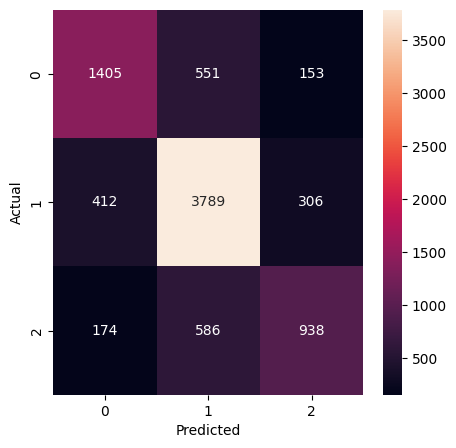

In [33]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_valid, y_pred)
print(cm)

plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt="d")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

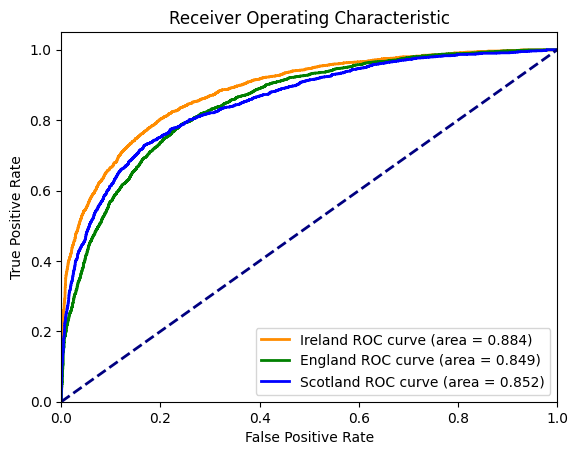

In [76]:
from sklearn.metrics import roc_curve, auc

y_pred_proba = clf._predict_proba_lr(X_valid)
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_valid, y_pred_proba[:, i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
lw = 2
plt.plot(fpr[0], tpr[0], color='darkorange', lw=lw, label='Ireland ROC curve (area = %0.3f)' % roc_auc[0])
plt.plot(fpr[1], tpr[1], color='green', lw=lw, label='England ROC curve (area = %0.3f)' % roc_auc[1])
plt.plot(fpr[2], tpr[2], color='blue', lw=lw, label='Scotland ROC curve (area = %0.3f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [85]:
# tfidf
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(strip_accents='unicode', sublinear_tf=True, max_features=100000)
X_TRAIN = vectorizer.fit_transform(X_stop_lemma)
X_TEST = vectorizer.transform(X_TEST_STOP_LEMMA)

In [86]:
# SVM
from sklearn.svm import LinearSVC

clf = LinearSVC(C=1.1, class_weight= {0: 0.63, 1: 0.33, 2: 0.63}).fit(X_TRAIN, y)

# predict
y_pred = clf.predict(X_TEST)

In [87]:
id2label = {0: 'Ireland', 1:'England', 2:'Scotland'}

prediction = [id2label[pred] for pred in y_pred]

answer = pd.DataFrame({'id':range(1, len(prediction) + 1),'label': prediction})
answer.to_csv('answer.csv', index=False)